Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             

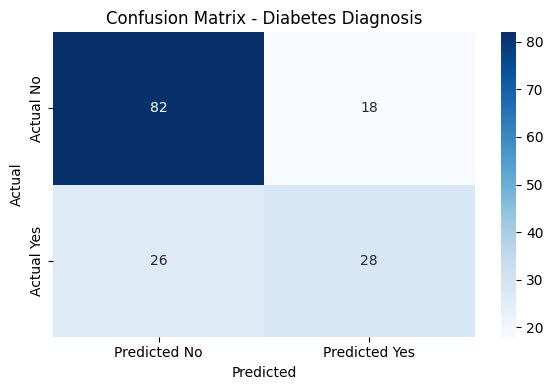


Confusion Matrix Details:
True Neg: 82
False Pos: 18
False Neg: 26
True Pos: 28

Model Evaluation Metrics:
Accuracy : 0.7143
Precision: 0.6087
Recall   : 0.5185
F1 Score : 0.5600

Detailed Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.82      0.79       100
    Diabetes       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [5]:
# Import necessary libraries for data handling, visualization, and machine learning
import pandas as pd                  # For data manipulation
import seaborn as sns               # For heatmap visualization
import matplotlib.pyplot as plt     # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler       # For standardizing (normalizing) data
from sklearn.linear_model import LogisticRegression    # For building a logistic regression model
from sklearn.metrics import (                          # For evaluating the model
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Load the dataset from the file
df = pd.read_csv("/content/2. Diagnose Diabetes.csv")

# Show basic information about the dataset (columns, data types, nulls, etc.)
print("Dataset Summary:")
print(df.info())

# Display the first 5 rows of the dataset for a quick look
print("\nFirst 5 rows of data:")
print(df.head())

# Separate features (independent variables) and target (dependent variable)
X = df.drop("Outcome", axis=1)  # All columns except 'Outcome' are features
y = df["Outcome"]               # 'Outcome' column is the target (0 or 1)

# Split the data into training and testing sets (80% train, 20% test)
# Stratify=y keeps the ratio of classes same in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the feature values to have mean = 0 and std = 1
# This helps many machine learning models perform better
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)        # Use the same transformation on test data

# Create a Logistic Regression model and train it on the training data
model = LogisticRegression(max_iter=200)  # max_iter ensures it runs enough iterations
model.fit(X_train_scaled, y_train)        # Fit the model to the training data

# Predict the outcome for the test set
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix to evaluate classification performance
cm = confusion_matrix(y_test, y_pred)

# Labels for interpreting the confusion matrix values
cm_labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
cm_reshaped = cm.reshape(-1)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix - Diabetes Diagnosis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Print detailed interpretation of the confusion matrix values
print("\nConfusion Matrix Details:")
for label, count in zip(cm_labels, cm_reshaped):
    print(f"{label}: {count}")

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)       # Overall correctness
precision = precision_score(y_test, y_pred)     # True Positives / (True Positives + False Positives)
recall = recall_score(y_test, y_pred)           # True Positives / (True Positives + False Negatives)
f1 = f1_score(y_test, y_pred)                   # Harmonic mean of precision and recall

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Print a full classification report showing precision, recall, F1-score for each class
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
